<a href="https://colab.research.google.com/github/vvamsi91/IML_AS5/blob/main/IML_AS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
c_t = [0.7, 15.0, 17.0, 26.0, 9.0, 7.0, 2.0, -3.0, 7.0, 12.0, 22.0]
u_t = [34.6, 54.6, 57.7, 82.9, 57.3, 49.9, 32.7, 22.8, 47.4, 62.4, 70.4]
c_t = torch.tensor(c_t)
u_t = torch.tensor(u_t)

In [ ]:

def model(u_t, w1, w2, b):
    return w2*u_t**2 + w1*u_t + b #w2 * u_t ** 2 + w1 * u_t + b.

In [ ]:

def loss_fn(p_t, c_t):
    squared_diffs = (p_t - c_t)**2
    return squared_diffs.mean()

In [ ]:
def training_loop(n_epochs, optimizer, params, u_t, c_t):
    for epoch in range(1, n_epochs + 1):
        p_t = model(u_t, *params)
        loss = loss_fn(p_t, c_t)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch <= 1 or epoch % 500 ==0:
            print(f"Epoch {epoch}, loss {loss.item():.4f}")

    return params

In [ ]:
import torch.optim as optim

dir(optim)

In [8]:
t_un = 0.1 * u_t
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    u_t = t_un,
    c_t = c_t)

Epoch 1, loss 734.0335
Epoch 500, loss 7.2256
Epoch 1000, loss 6.8021
Epoch 1500, loss 6.4692
Epoch 2000, loss 6.2855
Epoch 2500, loss 6.2146
Epoch 3000, loss 6.1965
Epoch 3500, loss 6.1937
Epoch 4000, loss 6.1935
Epoch 4500, loss 6.1935
Epoch 5000, loss 6.1935


tensor([  3.3936,   0.1509, -11.7454], requires_grad=True)

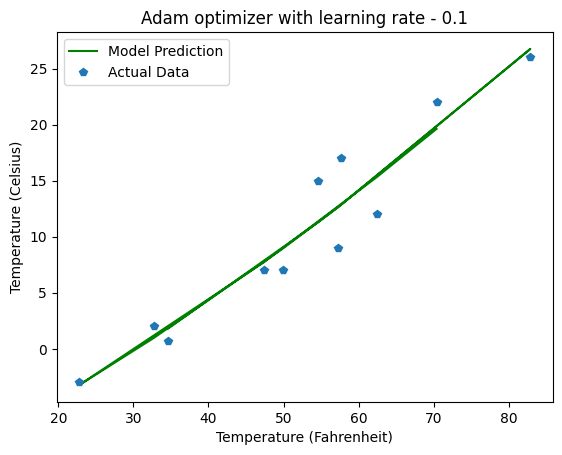

In [9]:

p_t = model(t_un, *params)

plt.figure()


plt.xlabel('Temperature (Fahrenheit)')              # Set labels for the axes
plt.ylabel('Temperature (Celsius)')


plt.plot(u_t.numpy(), p_t.detach().numpy(), color='green', label='Model Prediction')       # Plot the model's predictions in green color


plt.plot(u_t.numpy(), c_t.numpy(), 'p', label='Actual Data')                    # Plot the actual data as points
plt.title("Adam optimizer with learning rate - 0.1")

plt.legend()          # Add a legend to the plot


plt.show()        # Show the plot

In [10]:
t_un = 0.1 * u_t
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    u_t = t_un,
    c_t = c_t)

Epoch 1, loss 734.0335
Epoch 500, loss 9.2364
Epoch 1000, loss 8.0053
Epoch 1500, loss 7.5389
Epoch 2000, loss 7.4109
Epoch 2500, loss 7.3388
Epoch 3000, loss 7.2578
Epoch 3500, loss 7.1612
Epoch 4000, loss 7.0491
Epoch 4500, loss 6.9236
Epoch 5000, loss 6.7889


tensor([ 0.9092,  0.3773, -5.5195], requires_grad=True)

In [11]:

t_un.numpy()

array([3.4599998, 5.46     , 5.77     , 8.29     , 5.73     , 4.9900002,
       3.2700002, 2.28     , 4.7400002, 6.2400002, 7.0400004],
      dtype=float32)

In [12]:

p_t.detach().numpy()

array([ 1.8027334, 11.281647 , 12.858927 , 26.756702 , 12.653778 ,
        8.945604 ,  0.9650192, -3.2236557,  7.7301865, 15.305599 ,
       19.62344  ], dtype=float32)

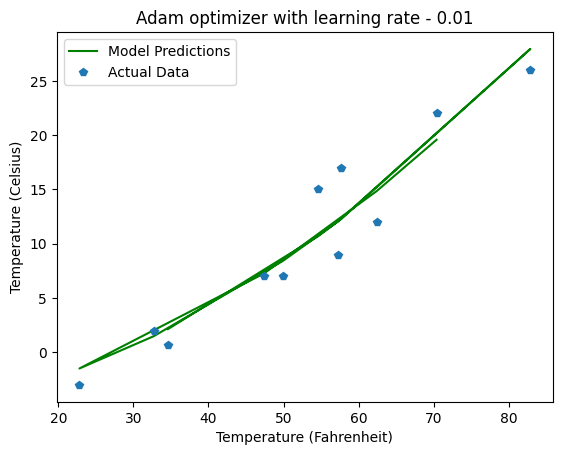

In [13]:

p_t = model(t_un, *params)

plt.figure()


plt.xlabel('Temperature (Fahrenheit)')           # Set labels for the axes
plt.ylabel('Temperature (Celsius)')


plt.plot(u_t.numpy(), p_t.detach().numpy(), color='green', label='Model Predictions')           # Plot the nodel's predictions in peachpuff color


plt.plot(u_t.numpy(), c_t.numpy(), 'p', label='Actual Data')                # Plot the actual data as points
plt.title("Adam optimizer with learning rate - 0.01")

plt.legend()               # Add a legend to the plot


plt.show()              # Add a legend to the plot

In [14]:
t_un = 0.1 * u_t
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    u_t = t_un,
    c_t = c_t)

Epoch 1, loss 734.0335
Epoch 500, loss 119.0270
Epoch 1000, loss 16.4095
Epoch 1500, loss 10.4005
Epoch 2000, loss 10.1361
Epoch 2500, loss 9.9107
Epoch 3000, loss 9.6448
Epoch 3500, loss 9.3439
Epoch 4000, loss 9.0188
Epoch 4500, loss 8.6857
Epoch 5000, loss 8.3654


tensor([ 0.0596,  0.4079, -1.5544], requires_grad=True)

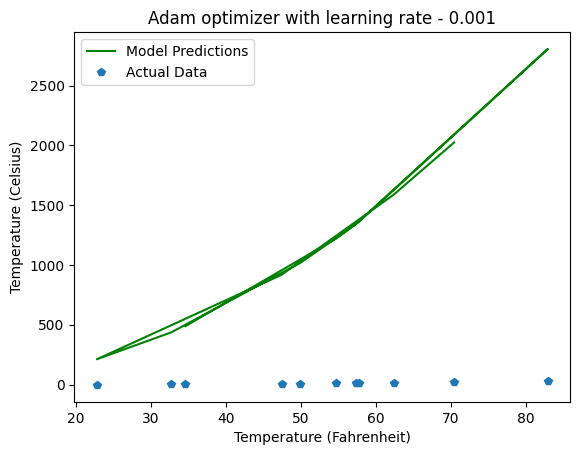

In [15]:

p_t = model(u_t, *params)

plt.figure()


plt.xlabel('Temperature (Fahrenheit)')             # Set labels for the axes
plt.ylabel('Temperature (Celsius)')


plt.plot(u_t.numpy(), p_t.detach().numpy(), color='green', label='Model Predictions')       # Plot the model's predictions in peachpuff color


plt.plot(u_t.numpy(), c_t.numpy(), 'p', label='Actual Data')           # Plot the actual data as points
plt.title("Adam optimizer with learning rate - 0.001")


plt.legend()             # Add a legend to the plot


plt.show()            # Show the plot

In [16]:

t_un = 0.1 * u_t
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    u_t = t_un,
    c_t = c_t)


Epoch 1, loss 734.0335
Epoch 500, loss 630.2830
Epoch 1000, loss 537.5020
Epoch 1500, loss 454.7903
Epoch 2000, loss 381.2271
Epoch 2500, loss 316.0623
Epoch 3000, loss 258.6812
Epoch 3500, loss 208.5712
Epoch 4000, loss 165.2895
Epoch 4500, loss 128.4364
Epoch 5000, loss 97.6274


tensor([ 0.5685,  0.5700, -0.4342], requires_grad=True)

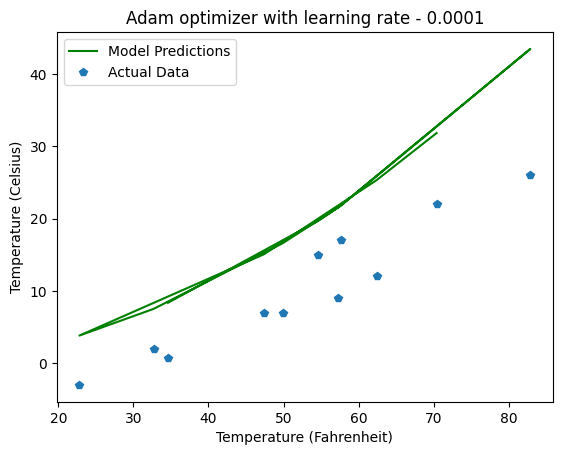

In [17]:

p_t = model(t_un, *params)

plt.figure()


plt.xlabel('Temperature (Fahrenheit)')       # Set labels for the axes
plt.ylabel('Temperature (Celsius)')


plt.plot(u_t.numpy(), p_t.detach().numpy(), color='green', label='Model Predictions')       # Plot the model's predictions in green color

plt.plot(u_t.numpy(), c_t.numpy(), 'p', label='Actual Data')
# Plot the actual data as points

plt.title("Adam optimizer with learning rate - 0.0001")


plt.legend()             # Add a legend to the plot

# Show the plot
plt.show()

In [18]:
t_un = 0.1 * u_t
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    u_t = t_un,
    c_t = c_t)

Epoch 1, loss 734.0335
Epoch 500, loss nan
Epoch 1000, loss nan
Epoch 1500, loss nan
Epoch 2000, loss nan
Epoch 2500, loss nan
Epoch 3000, loss nan
Epoch 3500, loss nan
Epoch 4000, loss nan
Epoch 4500, loss nan
Epoch 5000, loss nan


tensor([nan, nan, nan], requires_grad=True)

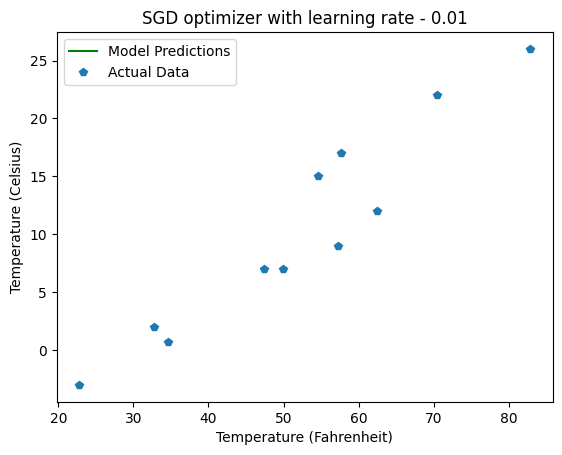

In [19]:
p_t = model(t_un, *params)

plt.figure()


plt.xlabel('Temperature (Fahrenheit)')            # Set labels for the axes
plt.ylabel('Temperature (Celsius)')

plt.plot(u_t.numpy(), p_t.detach().numpy(), color='green', label='Model Predictions')     # Plot the model's predictions in green color

plt.title("SGD optimizer with learning rate - 0.01")
plt.plot(u_t.numpy(), c_t.numpy(), 'p', label='Actual Data')
# Plot the actual data as points

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [20]:
t_un = 0.1 * u_t
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.000000001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    u_t = t_un,
    c_t = c_t)

Epoch 1, loss 734.0335
Epoch 500, loss 732.2793
Epoch 1000, loss 730.5236
Epoch 1500, loss 728.7701
Epoch 2000, loss 727.0186
Epoch 2500, loss 725.2696
Epoch 3000, loss 723.5225
Epoch 3500, loss 721.7775
Epoch 4000, loss 720.0348
Epoch 4500, loss 718.2942
Epoch 5000, loss 716.5558


tensor([ 9.9851e-01,  9.9076e-01, -2.4491e-04], requires_grad=True)

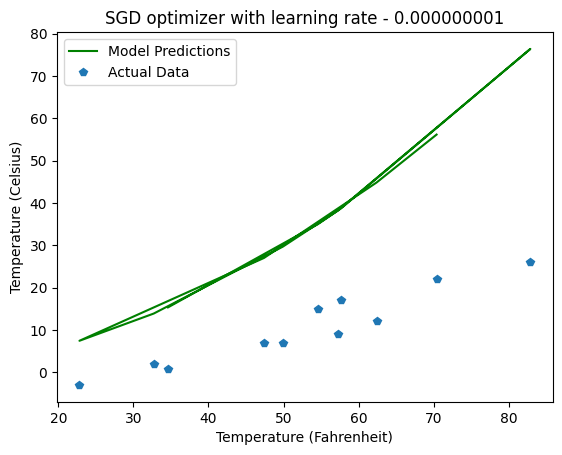

In [21]:
p_t = model(t_un, *params)

plt.figure()


plt.xlabel('Temperature (Fahrenheit)')             # Set labels for the axes
plt.ylabel('Temperature (Celsius)')


plt.plot(u_t.numpy(), p_t.detach().numpy(), color='green', label='Model Predictions')       # Plot the model's predictions in green color


plt.plot(u_t.numpy(), c_t.numpy(), 'p', label='Actual Data')
plt.title("SGD optimizer with learning rate - 0.000000001")        # Plot the actual data as points


plt.legend()              # Add a legend to the plot


plt.show()       # Show the plot


In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
np.random.seed(0)


In [24]:
Housing_data = pd.read_csv('https://raw.githubusercontent.com/vvamsi91/IML_AS5/main/Housing.csv')

# Display the first 5 rows of the DataFrame
Housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_feature = 'price'

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
Housing_data[input_features] = scaler_x.fit_transform(Housing_data[input_features])
Housing_data[[output_feature]] = scaler_y.fit_transform(Housing_data[[output_feature]])
Housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished


In [26]:
X = Housing_data[input_features].values
y = Housing_data[[output_feature]].values
def model(X, W, B):
    return torch.sum(X * W, dim=1) + B


In [27]:
def training_loop(n_epochs, optimizer, weights, bias, X_train, X_val, y_train, y_val):
    loss_train = []
    loss_val = []
    for epoch in range(1, n_epochs + 1):
        y_train_p = model(X_train, weights, bias)
        train_loss = loss_fn(y_train_p, y_train)

        y_val_p = model(X_train, weights, bias)
        val_loss = loss_fn(y_val_p, y_val)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            loss_train.append(train_loss)
            loss_val.append(val_loss)
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return weights, bias, loss_train, loss_val

In [28]:
def model_training(X, y, epochs, optimizer, learning_rate):
  train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train = torch.tensor(train_X)
  y_train =  torch.tensor(train_Y)
  X_val =  torch.tensor(val_X)
  y_val =  torch.tensor(val_Y)

  n_w = X.shape[1]
  weights = torch.tensor([1.0] * n_w, requires_grad=True)
  bias = torch.tensor([0.0], requires_grad=True)
  if optimizer == 'SGD':
    optimizer = optim.SGD([weights, bias], lr=learning_rate)
  elif optimizer == 'ADAM':
    optimizer = optim.Adam([weights, bias], lr=learning_rate)

  w, b, train_loss, val_loss = training_loop(
                                n_epochs = epochs,
                                optimizer = optimizer,
                                weights = weights,
                                bias = bias,
                                X_train = X_train,
                                X_val = X_val,
                                y_train = y_train,
                                y_val = y_val)
  return w, b, train_loss, val_loss

In [29]:
weights_adam_1, bias_adam_1, train_loss_adam_1, val_loss_adam_1 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.1)


Epoch 500, Training loss 0.0231, Validation loss 0.0386
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [30]:
weights_adam_1, bias_adam_1

(tensor([4.3485e-06, 4.3592e-06, 3.9977e-06, 4.1905e-06, 4.1613e-06],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [31]:
weights_adam_01, bias_adam_01, train_loss_adam_01, val_loss_adam_01 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.01)


Epoch 500, Training loss 0.0266, Validation loss 0.0424
Epoch 1000, Training loss 0.0234, Validation loss 0.0389
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [32]:

weights_adam_01, bias_adam_01

(tensor([ 1.1828e-07,  2.5502e-07, -6.8351e-08, -2.1430e-09,  6.7796e-09],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [33]:
weights_adam_001, bias_adam_001, train_loss_adam_001, val_loss_adam_001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.001)


Epoch 500, Training loss 0.2047, Validation loss 0.2117
Epoch 1000, Training loss 0.1061, Validation loss 0.1239
Epoch 1500, Training loss 0.0719, Validation loss 0.0899
Epoch 2000, Training loss 0.0487, Validation loss 0.0659
Epoch 2500, Training loss 0.0358, Validation loss 0.0524
Epoch 3000, Training loss 0.0297, Validation loss 0.0459
Epoch 3500, Training loss 0.0270, Validation loss 0.0428
Epoch 4000, Training loss 0.0254, Validation loss 0.0411
Epoch 4500, Training loss 0.0244, Validation loss 0.0400
Epoch 5000, Training loss 0.0237, Validation loss 0.0393


In [37]:

weights_adam_001, bias_adam_001

(tensor([ 0.0522,  0.1781, -0.0672, -0.0236, -0.0105], requires_grad=True),
 tensor([0.1860], requires_grad=True))

In [38]:
weights_adam_0001, bias_adam_0001, train_loss_adam_0001, val_loss_adam_0001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.0001)


Epoch 500, Training loss 1.1064, Validation loss 1.0777
Epoch 1000, Training loss 0.9080, Validation loss 0.8847
Epoch 1500, Training loss 0.7402, Validation loss 0.7219
Epoch 2000, Training loss 0.5992, Validation loss 0.5858
Epoch 2500, Training loss 0.4823, Validation loss 0.4735
Epoch 3000, Training loss 0.3869, Validation loss 0.3825
Epoch 3500, Training loss 0.3107, Validation loss 0.3104
Epoch 4000, Training loss 0.2516, Validation loss 0.2551
Epoch 4500, Training loss 0.2072, Validation loss 0.2143
Epoch 5000, Training loss 0.1752, Validation loss 0.1854


In [39]:

weights_adam_0001, bias_adam_0001

(tensor([0.6064, 0.6119, 0.5784, 0.5884, 0.5866], requires_grad=True),
 tensor([-0.3670], requires_grad=True))

In [40]:
weights_sgd_1, bias_sgd_1, train_loss_sgd_1, val_loss_sgd_1 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.1)


Epoch 500, Training loss 0.0235, Validation loss 0.0390
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [41]:

weights_sgd_1, bias_sgd_1

(tensor([ 5.8444e-07,  1.6221e-06, -6.0470e-07, -4.4821e-08,  3.9729e-08],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [42]:
weights_sgd_01, bias_sgd_01, train_loss_sgd_01, val_loss_sgd_01 =  model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.01)


Epoch 500, Training loss 0.0900, Validation loss 0.1071
Epoch 1000, Training loss 0.0447, Validation loss 0.0610
Epoch 1500, Training loss 0.0326, Validation loss 0.0485
Epoch 2000, Training loss 0.0284, Validation loss 0.0441
Epoch 2500, Training loss 0.0263, Validation loss 0.0420
Epoch 3000, Training loss 0.0252, Validation loss 0.0407
Epoch 3500, Training loss 0.0245, Validation loss 0.0400
Epoch 4000, Training loss 0.0240, Validation loss 0.0395
Epoch 4500, Training loss 0.0237, Validation loss 0.0392
Epoch 5000, Training loss 0.0235, Validation loss 0.0390


In [43]:

weights_sgd_01, bias_sgd_01

(tensor([ 0.0912,  0.0961,  0.0113, -0.0293, -0.0281], requires_grad=True),
 tensor([0.2086], requires_grad=True))

In [44]:
weights_sgd_001, bias_sgd_001, train_loss_sgd_001, val_loss_sgd_001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.001)


Epoch 500, Training loss 0.3233, Validation loss 0.3281
Epoch 1000, Training loss 0.2274, Validation loss 0.2421
Epoch 1500, Training loss 0.1964, Validation loss 0.2136
Epoch 2000, Training loss 0.1733, Validation loss 0.1909
Epoch 2500, Training loss 0.1536, Validation loss 0.1712
Epoch 3000, Training loss 0.1368, Validation loss 0.1543
Epoch 3500, Training loss 0.1223, Validation loss 0.1397
Epoch 4000, Training loss 0.1099, Validation loss 0.1271
Epoch 4500, Training loss 0.0992, Validation loss 0.1163
Epoch 5000, Training loss 0.0900, Validation loss 0.1070


In [45]:
weights_sgd_001, bias_sgd_001


(tensor([0.6123, 0.5272, 0.5757, 0.2545, 0.2784], requires_grad=True),
 tensor([-0.3091], requires_grad=True))

In [46]:
weights_sgd_0001, bias_sgd_0001, train_loss_sgd_0001, val_loss_sgd_0001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.0001)


Epoch 500, Training loss 1.0859, Validation loss 1.0583
Epoch 1000, Training loss 0.8918, Validation loss 0.8700
Epoch 1500, Training loss 0.7430, Validation loss 0.7263
Epoch 2000, Training loss 0.6288, Validation loss 0.6166
Epoch 2500, Training loss 0.5409, Validation loss 0.5326
Epoch 3000, Training loss 0.4732, Validation loss 0.4683
Epoch 3500, Training loss 0.4207, Validation loss 0.4188
Epoch 4000, Training loss 0.3800, Validation loss 0.3806
Epoch 4500, Training loss 0.3482, Validation loss 0.3510
Epoch 5000, Training loss 0.3231, Validation loss 0.3280


In [47]:
weights_sgd_0001, bias_sgd_0001

(tensor([0.8369, 0.7544, 0.8998, 0.7654, 0.7854], requires_grad=True),
 tensor([-0.4963], requires_grad=True))

In [48]:
epochs = range(1, 500 * len(train_loss_sgd_1), 500)
epochs

range(1, 5000, 500)

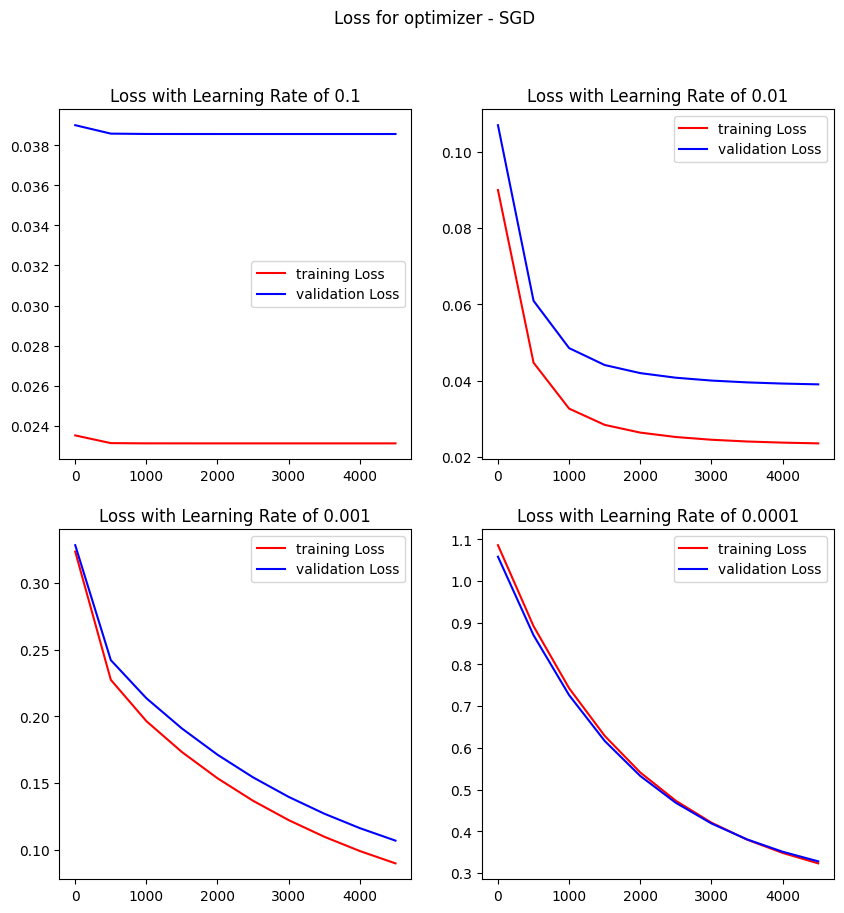

In [49]:

plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_1]), color='red', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_1]), color='blue', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_01]), color='red', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_01]), color='blue', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_001]), color='red', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_001]), color='blue', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_0001]), color='red', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_0001]), color='blue', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()

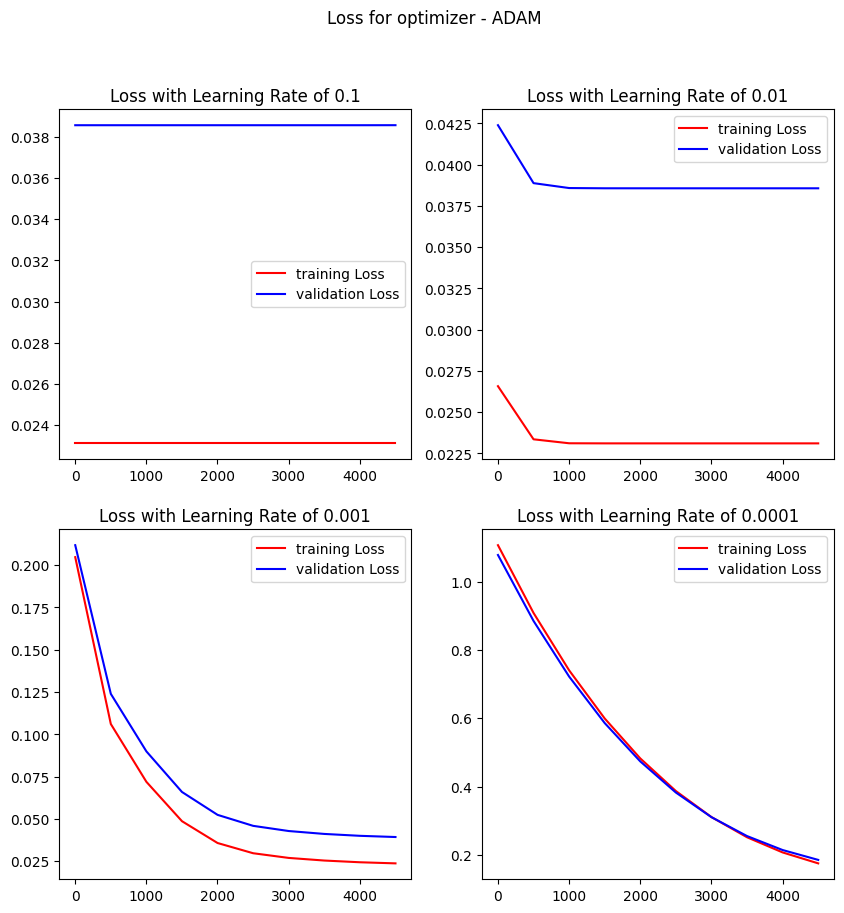

In [50]:

plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer - ADAM')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_1]), color='red', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_1]), color='blue', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_01]), color='red', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_01]), color='blue', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_001]), color='red', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_001]), color='blue', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_0001]), color='red', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_0001]), color='blue', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()

In [51]:
Housing_data = pd.read_csv('https://raw.githubusercontent.com/vvamsi91/IML_AS5/main/Housing.csv')

# Display the first 5 rows of the DataFrame
Housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [52]:
Housing_data['furnishingstatus'].value_counts().unique

<bound method Series.unique of semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64>

In [53]:
Housing_data = pd.get_dummies(Housing_data, columns=['furnishingstatus'], drop_first=False)
Housing_data = Housing_data.drop('furnishingstatus_semi-furnished', axis=1)

Housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,0,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1,0


In [54]:
binary_columns = Housing_data.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [55]:
Housing_data[binary_columns] = Housing_data[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   price                         545 non-null    int64
 1   area                          545 non-null    int64
 2   bedrooms                      545 non-null    int64
 3   bathrooms                     545 non-null    int64
 4   stories                       545 non-null    int64
 5   mainroad                      545 non-null    int64
 6   guestroom                     545 non-null    int64
 7   basement                      545 non-null    int64
 8   hotwaterheating               545 non-null    int64
 9   airconditioning               545 non-null    int64
 10  parking                       545 non-null    int64
 11  prefarea                      545 non-null    int64
 12  furnishingstatus_furnished    545 non-null    uint8
 13  furnishingstatus_unfurnished  545 n

In [56]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [57]:

X = Housing_data.drop('price', axis = 1)
y = Housing_data[['price']]


In [58]:

X = pd.DataFrame(scaler_x.fit_transform(X), columns=X.columns, index=X.index).values
y = pd.DataFrame(scaler_y.fit_transform(y), columns=y.columns, index=y.index).values


In [59]:
weights_adam_1, bias_adam_1, train_loss_adam_1, val_loss_adam_1 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.1)


Epoch 500, Training loss 0.0231, Validation loss 0.0386
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [60]:
weights_adam_1, bias_adam_1

(tensor([ 5.4853e-09,  2.0843e-08, -4.5936e-09, -6.5771e-10,  7.4842e-09,
         -3.9867e-10,  1.4340e-09,  1.3484e-09, -2.6016e-10, -1.4452e-10,
         -9.6614e-10,  1.5285e-09,  3.6333e-09], requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [61]:
weights_adam_01, bias_adam_01, train_loss_adam_01, val_loss_adam_01 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.01)


Epoch 500, Training loss 0.0605, Validation loss 0.0784
Epoch 1000, Training loss 0.0353, Validation loss 0.0518
Epoch 1500, Training loss 0.0273, Validation loss 0.0433
Epoch 2000, Training loss 0.0244, Validation loss 0.0401
Epoch 2500, Training loss 0.0234, Validation loss 0.0390
Epoch 3000, Training loss 0.0232, Validation loss 0.0387
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [62]:
weights_adam_01, bias_adam_01


(tensor([-2.0866e-07,  4.0596e-05, -1.0004e-05, -6.8162e-06,  6.8431e-06,
          1.9621e-07, -6.6898e-07,  8.3814e-07, -1.6544e-08, -1.2367e-06,
         -1.3017e-06,  1.0794e-06,  2.2106e-06], requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [63]:
weights_adam_001, bias_adam_001, train_loss_adam_001, val_loss_adam_001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.001)


Epoch 500, Training loss 3.1856, Validation loss 3.1219
Epoch 1000, Training loss 0.4633, Validation loss 0.4578
Epoch 1500, Training loss 0.1503, Validation loss 0.1660
Epoch 2000, Training loss 0.1138, Validation loss 0.1334
Epoch 2500, Training loss 0.0929, Validation loss 0.1122
Epoch 3000, Training loss 0.0768, Validation loss 0.0955
Epoch 3500, Training loss 0.0642, Validation loss 0.0824
Epoch 4000, Training loss 0.0545, Validation loss 0.0721
Epoch 4500, Training loss 0.0469, Validation loss 0.0641
Epoch 5000, Training loss 0.0408, Validation loss 0.0577


In [64]:
weights_adam_001, bias_adam_001


(tensor([ 0.2128,  0.4137, -0.0796,  0.0596,  0.2615, -0.0317,  0.0713,  0.0340,
         -0.0295,  0.0121, -0.0393,  0.0504,  0.1279], requires_grad=True),
 tensor([-0.2757], requires_grad=True))

In [65]:
weights_adam_0001, bias_adam_0001, train_loss_adam_0001, val_loss_adam_0001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.0001)


Epoch 500, Training loss 13.0457, Validation loss 12.8904
Epoch 1000, Training loss 11.3789, Validation loss 11.2355
Epoch 1500, Training loss 9.8671, Validation loss 9.7352
Epoch 2000, Training loss 8.4970, Validation loss 8.3764
Epoch 2500, Training loss 7.2580, Validation loss 7.1485
Epoch 3000, Training loss 6.1414, Validation loss 6.0428
Epoch 3500, Training loss 5.1404, Validation loss 5.0523
Epoch 4000, Training loss 4.2489, Validation loss 4.1712
Epoch 4500, Training loss 3.4619, Validation loss 3.3943
Epoch 5000, Training loss 2.7748, Validation loss 2.7171


In [66]:
weights_adam_0001, bias_adam_0001


(tensor([0.5580, 0.5592, 0.5553, 0.5571, 0.5588, 0.5530, 0.5554, 0.5571, 0.5542,
         0.5563, 0.5540, 0.5553, 0.5615], requires_grad=True),
 tensor([-0.4394], requires_grad=True))

In [67]:
weights_sgd_1, bias_sgd_1, train_loss_sgd_1, val_loss_sgd_1 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.1)


Epoch 500, Training loss 0.0236, Validation loss 0.0391
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [68]:
weights_sgd_1, bias_sgd_1


(tensor([ 3.3234e-07,  2.1203e-06, -7.5498e-07, -1.5237e-07,  5.3786e-07,
         -1.4389e-08,  7.3909e-08,  1.0228e-07, -6.9081e-09, -1.0148e-08,
         -8.3590e-08,  1.0964e-07,  2.4538e-07], requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [69]:
weights_sgd_01, bias_sgd_01, train_loss_sgd_01, val_loss_sgd_01 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.01)


Epoch 500, Training loss 0.1272, Validation loss 0.1449
Epoch 1000, Training loss 0.0591, Validation loss 0.0757
Epoch 1500, Training loss 0.0386, Validation loss 0.0547
Epoch 2000, Training loss 0.0308, Validation loss 0.0467
Epoch 2500, Training loss 0.0274, Validation loss 0.0431
Epoch 3000, Training loss 0.0257, Validation loss 0.0413
Epoch 3500, Training loss 0.0247, Validation loss 0.0403
Epoch 4000, Training loss 0.0242, Validation loss 0.0397
Epoch 4500, Training loss 0.0238, Validation loss 0.0394
Epoch 5000, Training loss 0.0236, Validation loss 0.0391


In [70]:
weights_sgd_01, bias_sgd_01


(tensor([ 0.0908,  0.1152,  0.0146, -0.0318,  0.0100, -0.0054, -0.0024,  0.0098,
         -0.0027, -0.0278, -0.0067,  0.0036,  0.0068], requires_grad=True),
 tensor([0.1933], requires_grad=True))

In [71]:
weights_sgd_001, bias_sgd_001, train_loss_sgd_001, val_loss_sgd_001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.001)


Epoch 500, Training loss 0.6403, Validation loss 0.6492
Epoch 1000, Training loss 0.4374, Validation loss 0.4575
Epoch 1500, Training loss 0.3470, Validation loss 0.3671
Epoch 2000, Training loss 0.2846, Validation loss 0.3042
Epoch 2500, Training loss 0.2396, Validation loss 0.2586
Epoch 3000, Training loss 0.2057, Validation loss 0.2244
Epoch 3500, Training loss 0.1794, Validation loss 0.1977
Epoch 4000, Training loss 0.1584, Validation loss 0.1765
Epoch 4500, Training loss 0.1413, Validation loss 0.1591
Epoch 5000, Training loss 0.1271, Validation loss 0.1447


In [72]:
weights_sgd_001, bias_sgd_001


(tensor([ 0.5176,  0.4371,  0.5646,  0.2609,  0.0940,  0.0952,  0.0704,  0.6189,
         -0.0675,  0.2547,  0.0814,  0.1967,  0.4130], requires_grad=True),
 tensor([-0.5902], requires_grad=True))

In [73]:
weights_sgd_0001, bias_sgd_0001, train_loss_sgd_0001, val_loss_sgd_0001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.0001)


Epoch 500, Training loss 9.0245, Validation loss 8.9016
Epoch 1000, Training loss 5.5765, Validation loss 5.4878
Epoch 1500, Training loss 3.5477, Validation loss 3.4850
Epoch 2000, Training loss 2.3504, Validation loss 2.3077
Epoch 2500, Training loss 1.6407, Validation loss 1.6132
Epoch 3000, Training loss 1.2170, Validation loss 1.2012
Epoch 3500, Training loss 0.9612, Validation loss 0.9542
Epoch 4000, Training loss 0.8040, Validation loss 0.8038
Epoch 4500, Training loss 0.7050, Validation loss 0.7099
Epoch 5000, Training loss 0.6403, Validation loss 0.6491


In [74]:
weights_sgd_0001, bias_sgd_0001


(tensor([ 0.6591,  0.4947,  0.8329,  0.5950, -0.0886,  0.5903,  0.3723,  0.9077,
          0.3949,  0.6206,  0.5298,  0.5412,  0.6495], requires_grad=True),
 tensor([-1.1368], requires_grad=True))

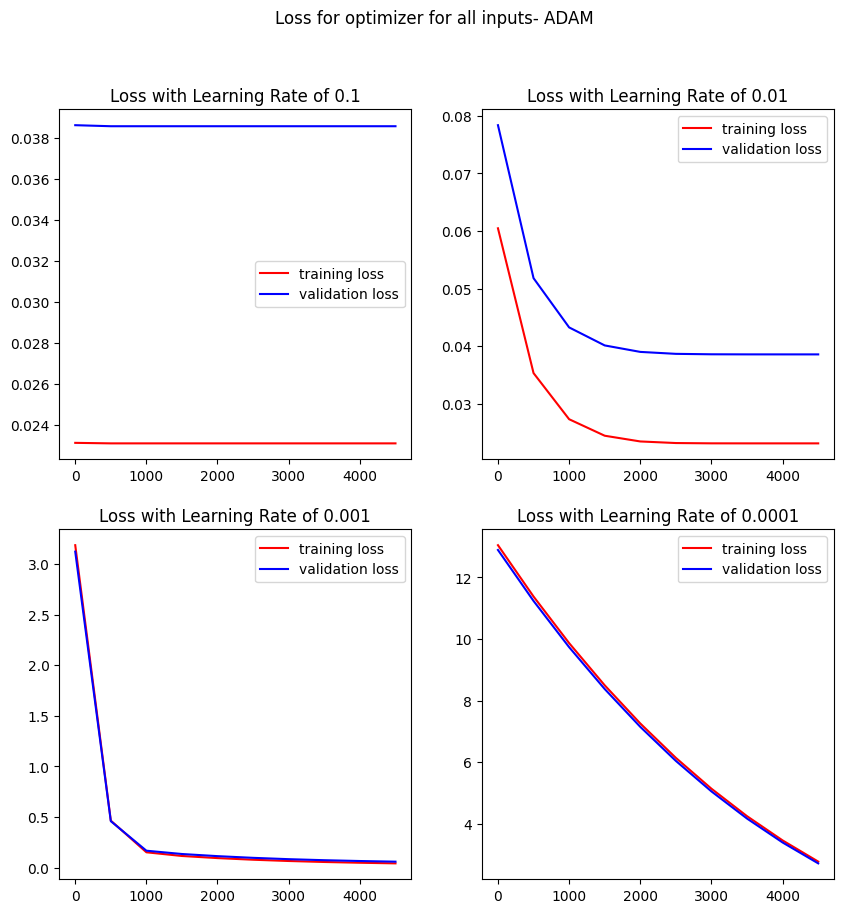

In [77]:
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer for all inputs- ADAM')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_1]), color='red', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_1]), color='blue', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_01]), color='red', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_01]), color='blue', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_001]), color='red', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_001]), color='blue', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_0001]), color='red', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_0001]), color='blue', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()


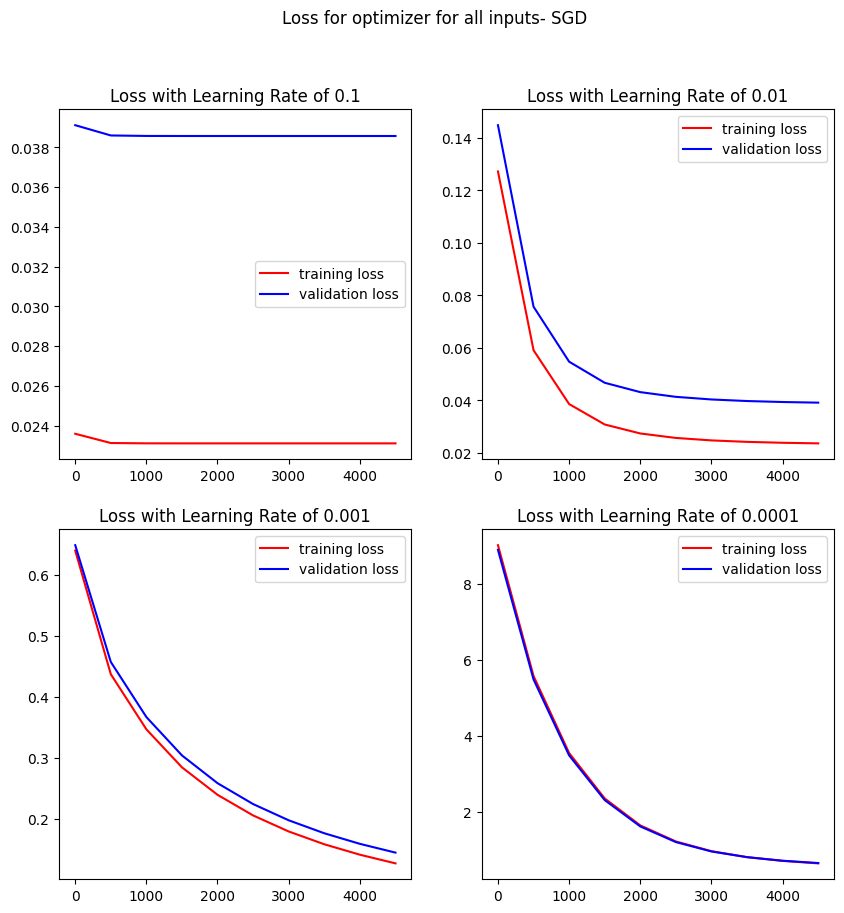

In [79]:
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer for all inputs- SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_1]), color='red', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_1]), color='blue', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_01]), color='red', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_01]), color='blue', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_001]), color='red', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_001]), color='blue', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_0001]), color='red', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_0001]), color='blue', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()
